<a href="https://colab.research.google.com/github/francji1/01NAEX/blob/main/code/01NAEX_Exercise_10_SN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Drying of beech wood planks

To investigate the effect of drying of beech wood on the humidity percentage, the following experiment was conducted. Each of 20 planks was dried in a certain period of time. Then the humidity percentage was measured in 5 depths (1,3,5,7,9) and 3 widths (1,2,3) for each plank.

**Source:** The Royal Veterinary and Agricultural University, Denmark.


**Variables:**
* plank 	 -   Numbered 1-20
* width      -   Numbered 1,2,3
* depth 	 -   Numbered 1,3,5,7,9
* humidity   -   Humidity percentage

**Number of observations:** 300 (20 planks)

**Description:**
* depth 1: 	close to the top
* depth 5: 	in the center
* depth 9: 	close to the bottom
* depth 3: 	between 1 and 5
* depth 7: 	between 5 and 9
* width 1: 	close to the side
* width 3: 	in the center
* width 2: 	between 1 and 3


**Analyze data from the Drying of beech wood planks:**

* Plot four average humidity profiles: 2 interaction plots for width and 2 for depth (done).
* Carrying out the fixed effects model analysis.
* Carry out the mixed model analysis.
* Run the post hoc analysis
* Compare the fixed parameters and use the p-value correction (TukeyHSD).
 (In R: Use function `lsmeans`  from the package `lsmeans` with `adjust="tukey`.)
* Summarize results.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
planks = pd.read_csv("https://raw.githubusercontent.com/francji1/01NAEX/main/data/planks.txt",sep=",")
planks

,plank,width,depth,humidity
0,1,1,1,3.4
1,1,1,3,4.9
2,1,1,5,5.0
3,1,1,7,4.9
4,1,1,9,4.0
...,...,...,...,...
295,20,3,1,4.7
296,20,3,3,6.0
297,20,3,5,6.0
298,20,3,7,6.3


In [ ]:
planks['plank'] = planks['plank'].astype('category')
planks['width'] = planks['width'].astype('category')
planks['depth'] = planks['depth'].astype('category')


In [ ]:
planks.describe()

,humidity
count,300.000000
mean,5.466333
std,1.353961
min,3.000000
25%,4.400000
50%,5.200000
75%,6.300000
max,9.500000


In [ ]:
def interaction_plot(x, trace, response, data, ax):
    categories_x = data[x].cat.categories
    categories_trace = data[trace].cat.categories

    for trace_level in categories_trace:
        subset = data[data[trace] == trace_level]
        means = subset.groupby(x)[response].mean()
        ax.plot(categories_x, means, label=f"{trace}: {trace_level}")

    ax.set_xlabel(x)
    ax.set_ylabel(response)
    ax.legend(title=trace, loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')  # Adjust legend position
    ax.grid(True)


/tmp/ipython-input-1662346005.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = subset.groupby(x)[response].mean()


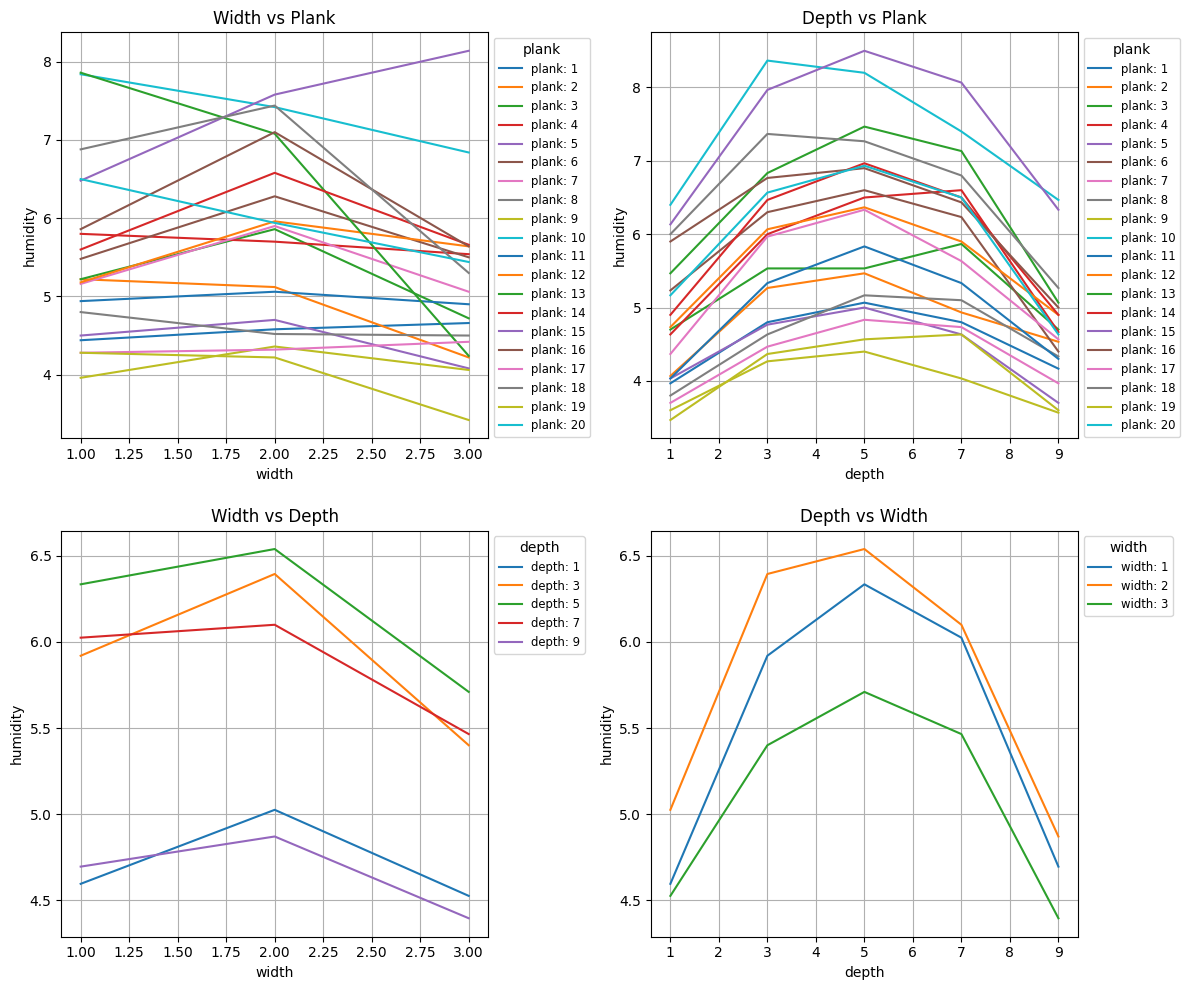

In [ ]:

# Creating the 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: width vs plank
interaction_plot('width', 'plank', 'humidity', planks, axes[0, 0])
axes[0, 0].set_title("Width vs Plank")

# Plot 2: depth vs plank
interaction_plot('depth', 'plank', 'humidity', planks, axes[0, 1])
axes[0, 1].set_title("Depth vs Plank")

# Plot 3: width vs depth
interaction_plot('width', 'depth', 'humidity', planks, axes[1, 0])
axes[1, 0].set_title("Width vs Depth")

# Plot 4: depth vs width
interaction_plot('depth', 'width', 'humidity', planks, axes[1, 1])
axes[1, 1].set_title("Depth vs Width")

plt.tight_layout()
plt.show()


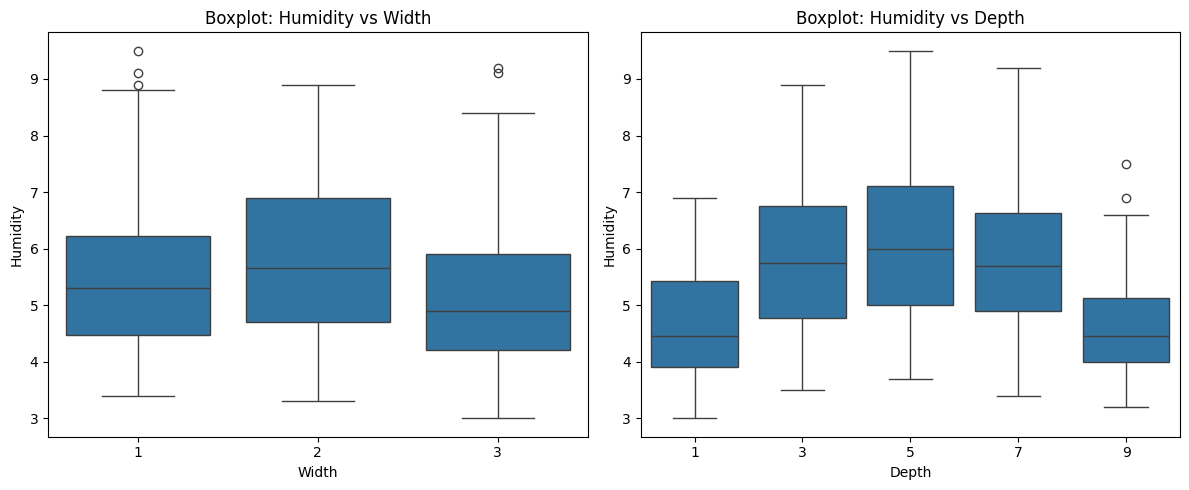

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# --- BOXPLOT for width ---
plt.subplot(1, 2, 1)
sns.boxplot(x="width", y="humidity", data=planks)
plt.title("Boxplot: Humidity vs Width")
plt.xlabel("Width")
plt.ylabel("Humidity")

# --- BOXPLOT for depth ---
plt.subplot(1, 2, 2)
sns.boxplot(x="depth", y="humidity", data=planks)
plt.title("Boxplot: Humidity vs Depth")
plt.xlabel("Depth")
plt.ylabel("Humidity")

plt.tight_layout()
plt.show()

The plots show that the humidity of the planks depends on both width and depth. The highest moisture content is observed in the central part of the planks within the depth, while the surface layers are significantly drier. The changes in humidity across the width are not very large.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

#Fixed model, ANOVA
fixed_model_formula = 'humidity ~ C(plank) + C(width) + C(depth)'
fixed_model = smf.ols(formula=fixed_model_formula, data=planks).fit()
print(fixed_model.summary())
print("\n" + "="*50 + "\n")

print("## 1. Results for Fixed Effects Model (ANOVA)")
fixed_anova = anova_lm(fixed_model, typ=2)
print("\n--- ANOVA Results ---")
print(fixed_anova)

                            OLS Regression Results                            
Dep. Variable:               humidity   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     43.21
Date:                Mon, 15 Dec 2025   Prob (F-statistic):           2.92e-80
Time:                        18:10:52   Log-Likelihood:                -276.41
No. Observations:                 300   AIC:                             604.8
Df Residuals:                     274   BIC:                             701.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.8563      0.187     20.

The fixed-effects ANOVA model shows that all variables are statistically significant, with width having a smaller effect on humidity than depth.

In [ ]:
#Mixed model
mixed_model_formula = 'humidity ~ C(width) + C(depth)'
mixed_model = smf.mixedlm(mixed_model_formula, data=planks, groups=planks["plank"]).fit()
print("\n--- Mixed Effects Model (LMM) Results ---")
print(mixed_model.summary())


--- Mixed Effects Model (LMM) Results ---
         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: humidity 
No. Observations:  300     Method:             REML     
No. Groups:        20      Scale:              0.4047   
Min. group size:   15      Log-Likelihood:     -331.9119
Max. group size:   15      Converged:          Yes      
Mean group size:   15.0                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      4.763    0.242 19.703 0.000  4.289  5.236
C(width)[T.2]  0.272    0.090  3.023 0.003  0.096  0.448
C(width)[T.3] -0.415    0.090 -4.613 0.000 -0.591 -0.239
C(depth)[T.3]  1.190    0.116 10.245 0.000  0.962  1.418
C(depth)[T.5]  1.480    0.116 12.742 0.000  1.252  1.708
C(depth)[T.7]  1.148    0.116  9.886 0.000  0.921  1.376
C(depth)[T.9] -0.062    0.116 -0.531 0.595 -0.289  0.16

In the mixed-effects model, plank is treated as a random effect, capturing differences between individual planks. Depth remains strongly significant, with higher humidity in the center of the plank and no significant difference between the two surface depths.
The effect of width is weaker, with only small differences observed between width positions.
The random-effect variance (0.98) indicates substantial variability between planks, confirming that the mixed-effects model is appropriate for these data.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 3. Post-hoc Analysis (Tukey's HSD) - width
# Run Tukey’s HSD
tukey_results_width = pairwise_tukeyhsd(
    endog=planks["humidity"],
    groups=planks["width"],
    alpha=0.05)

print("\n--- Post-hoc Analysis (Tukey's HSD) for Width ---")
print(tukey_results_width)


--- Post-hoc Analysis (Tukey's HSD) for Width ---
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2    0.272 0.3179 -0.1706  0.7146  False
     1      3   -0.415 0.0713 -0.8576  0.0276  False
     2      3   -0.687 0.0009 -1.1296 -0.2444   True
----------------------------------------------------


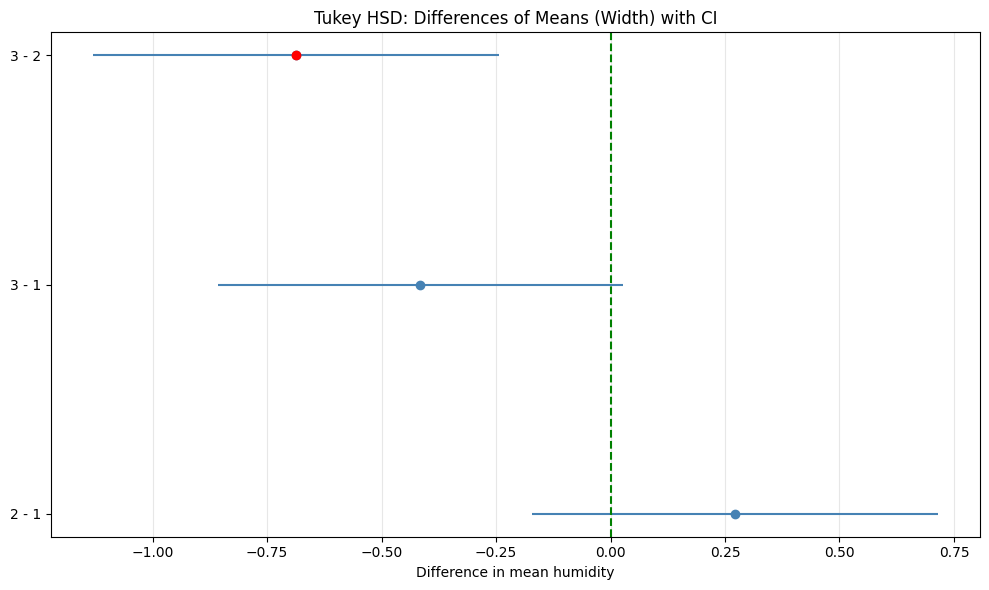

In [ ]:
#Visualization - Width
tukey_table = tukey_results_width.summary().data
rows = tukey_table[1:]

group1 = [row[0] for row in rows]
group2 = [row[1] for row in rows]
meandiff = np.array([row[2] for row in rows], dtype=float)
ci_low = np.array([row[4] for row in rows], dtype=float)
ci_high = np.array([row[5] for row in rows], dtype=float)
reject = [row[6] for row in rows]

labels = [f"{g2} - {g1}" for g1, g2 in zip(group1, group2)]
y = np.arange(len(meandiff))

plt.figure(figsize=(10, 6))
#confidence intervals
plt.hlines(y, ci_low, ci_high, color="steelblue")
plt.plot(meandiff, y, "o", color="steelblue")
# vertical line 0
plt.axvline(0, color="green", linestyle="--")

#red dot = reject
for i, sig in enumerate(reject):
    if sig:
        plt.plot(meandiff[i], y[i], "o", color="red")

plt.yticks(y, labels)
plt.xlabel("Difference in mean humidity")
plt.title("Tukey HSD: Differences of Means (Width) with CI")
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()

This test compares all combinations of width groups. A statistically significant difference was found between width positions 2 and 3, where 3 has lower humidity than 2.

In [ ]:
# 3. Post-hoc Analysis (Tukey's HSD) - depth
# Run Tukey’s HSD
tukey_results_depth = pairwise_tukeyhsd(
    endog=planks["humidity"],
    groups=planks["depth"],
    alpha=0.05)

print("\n--- Post-hoc Analysis (Tukey's HSD) for Depth ---")
print(tukey_results_depth)



--- Post-hoc Analysis (Tukey's HSD) for Depth ---
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      3     1.19    0.0  0.5908  1.7892   True
     1      5     1.48    0.0  0.8808  2.0792   True
     1      7   1.1483    0.0  0.5492  1.7475   True
     1      9  -0.0617 0.9986 -0.6608  0.5375  False
     3      5     0.29 0.6737 -0.3092  0.8892  False
     3      7  -0.0417 0.9997 -0.6408  0.5575  False
     3      9  -1.2517    0.0 -1.8508 -0.6525   True
     5      7  -0.3317 0.5507 -0.9308  0.2675  False
     5      9  -1.5417    0.0 -2.1408 -0.9425   True
     7      9    -1.21    0.0 -1.8092 -0.6108   True
----------------------------------------------------


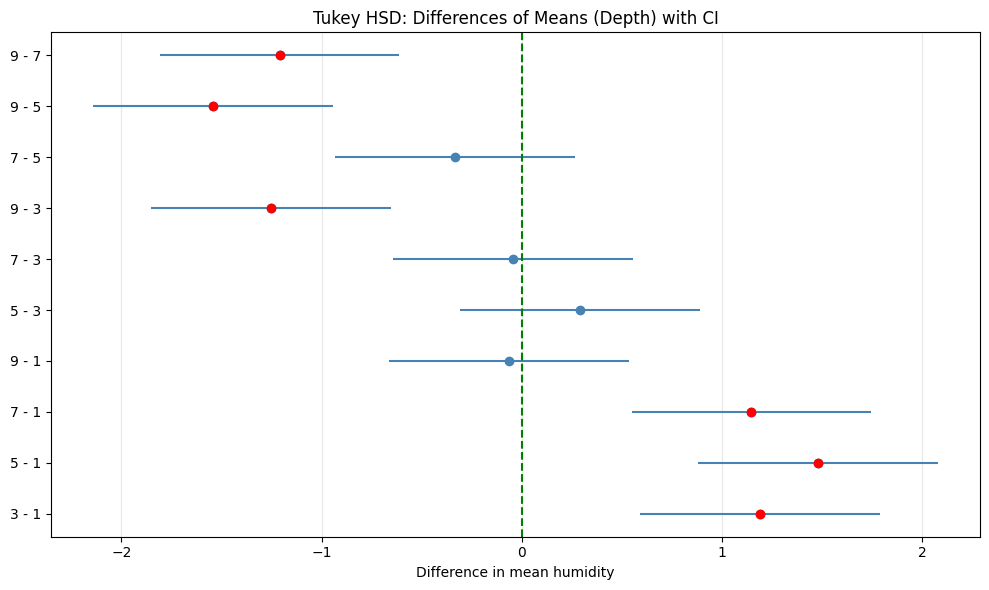

In [ ]:
#Visualization - Depth
tukey_table = tukey_results_depth.summary().data
header = tukey_table[0]
rows = tukey_table[1:]

group1 = [row[0] for row in rows]
group2 = [row[1] for row in rows]
meandiff = np.array([row[2] for row in rows], dtype=float)
ci_low = np.array([row[4] for row in rows], dtype=float)
ci_high = np.array([row[5] for row in rows], dtype=float)
reject = [row[6] for row in rows]

labels = [f"{g2} - {g1}" for g1, g2 in zip(group1, group2)]
y = np.arange(len(meandiff))

plt.figure(figsize=(10, 6))
#confidence intervals
plt.hlines(y, ci_low, ci_high, color="steelblue")
plt.plot(meandiff, y, "o", color="steelblue")
#vertical line 0
plt.axvline(0, color="green", linestyle="--")
#red dot = reject
for i, sig in enumerate(reject):
    if sig:
        plt.plot(meandiff[i], y[i], "o", color="red")

plt.yticks(y, labels)
plt.xlabel("Difference in mean humidity")
plt.title("Tukey HSD: Differences of Means (Depth) with CI")
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()

This test compares all depth groups. The results indicate statistically significant differences between the surface depths (1 and 9) and all other depth positions. No significant difference was found between depths 1 and 9

#Conclusions
The analysis of the wood plank data employed a fixed-effects model, a mixed-effects model, and post-hoc comparisons. Width and depth were treated as fixed factors, while individual planks were modeled as a random effect.

The results show that drying is symmetric through the thickness of the plank, with the surface layers being noticeably drier and the central region retaining significantly more moisture. Depth has a strong and statistically significant effect on humidity, with the highest moisture content consistently observed at depths 3, 5, and 7.

In contrast, the effect of width on humidity is relatively weak, with only small differences observed between width positions; however, the highest humidity is found between the surface and the center - width 2 (width 2 and 3 were swapped in the school figure).
